In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 

## Loading in Scraped Tweets

In [2]:
airline = pd.read_csv("UnitedAirlines.csv")
airline.head(3)

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,12/11/2019 7:59,0,0,"@ united hour six... still no bag, I now have ...",NaN,@,NaN,1.19404E+18,https://twitter.com/Samaymay1234/status/119404...,NaN,NaN,NaN,NaN,NaN
1,NaN,12/11/2019 7:59,0,0,My son-in-law flies for United (after retiring...,NaN,NaN,NaN,1.19404E+18,https://twitter.com/faithhoffman20/status/1194...,NaN,NaN,NaN,NaN,NaN
2,NaN,12/11/2019 7:59,0,0,"Hi, AJ. Can you please send over your confirma...",NaN,NaN,NaN,1.19404E+18,https://twitter.com/united/status/119404189954...,NaN,NaN,NaN,NaN,NaN


In [103]:
airline_recent = pd.read_csv('United Airlines Recent.csv')

In [105]:
airline_recent_2 = pd.read_csv('United Airlines Recent2.csv')

In [106]:
airline_recent.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10
0,NaN,22/11/2019 7:59,0,0,@ united UA5873 out of SNA is delayed 1.5 hrs ...,NaN,@,NaN,1.19767E+18,https://twitter.com/dub_sea/status/11976659244...,NaN
1,NaN,22/11/2019 7:57,1,8,"Atlanta to Portland, Oregon (& vice versa) for...",NaN,@,NaN,1.19767E+18,https://twitter.com/SecretFlying/status/119766...,NaN
2,NaN,22/11/2019 7:56,0,0,United Airline Passenger Doesn't Want to Sit N...,NaN,NaN,NaN,1.19767E+18,https://twitter.com/kwillsmom/status/119766500...,NaN
3,NaN,22/11/2019 7:55,0,0,"Our apologies, Paul. We can follow up with our...",NaN,NaN,NaN,1.19766E+18,https://twitter.com/united/status/119766493637...,NaN
4,NaN,22/11/2019 7:54,0,2,Did you guys know that united airlines gives a...,NaN,NaN,NaN,1.19766E+18,https://twitter.com/keoniquanico/status/119766...,NaN


In [107]:
airline_recent_2.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,18/11/2019 7:59,0,0,Can you send over a DM with your confirmation ...,NaN,NaN,NaN,1.19622E+18,https://twitter.com/united/status/119621626813...,NaN,NaN,NaN
1,NaN,18/11/2019 7:57,0,0,We'll pass along the feedback. ^MD,NaN,NaN,NaN,1.19622E+18,https://twitter.com/united/status/119621589999...,NaN,NaN,NaN
2,NaN,18/11/2019 7:57,0,0,Remembered to @ DuolingoUS after an interestin...,NaN,@ @,NaN,1.19622E+18,https://twitter.com/j2blather/status/119621580...,NaN,NaN,NaN
3,NaN,18/11/2019 7:56,0,1,Hey @ united when are you going to start offer...,NaN,@,NaN,1.19622E+18,https://twitter.com/therealsolross/status/1196...,NaN,NaN,NaN
4,NaN,18/11/2019 7:56,0,0,More of the gate staff yelling at each other a...,NaN,NaN,NaN,1.19622E+18,https://twitter.com/tessabarrera/status/119621...,NaN,NaN,NaN


## Combining into one dataframe

In [110]:
airline = pd.concat([airline, airline_recent, airline_recent_2], axis=0)

C:\Users\Chiran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [111]:
airline.shape

airline = airline.dropna(subset=['permalink'])

In [112]:
airline.shape

(9756, 15)

## Removing duplicate tweets

In [114]:
airline = airline.drop_duplicates(subset=['permalink'])

## Removing Tweets that were tweeted by the United Airline twitter account.

We do this so that we can focus only on Tweets that are directed towards UA, hence we filter out the Tweets that were created by United Airlines themselves

In [115]:
airline = airline[~airline['permalink'].str.contains('united')]

airline.shape

(8626, 15)

In [116]:
list(airline)

['Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'date',
 'favorites',
 'geo',
 'hashtags',
 'id',
 'mentions',
 'permalink',
 'retweets',
 'text',
 'username']

In [117]:
df = airline.drop(columns=['username',
 'date',
 'retweets',
 'favorites',
 'geo',
 'mentions',
 'hashtags',
 'id',
 'permalink',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14'])

df.head()

,text
0,"@ united hour six... still no bag, I now have ..."
1,My son-in-law flies for United (after retiring...
3,@ united how many times are you going to delay...
4,"Hey # Chicago peeps, is the weather really tha..."
5,@ united these delays are killer


In [118]:
df["text"]

0       @ united hour six... still no bag, I now have ...
1       My son-in-law flies for United (after retiring...
3       @ united how many times are you going to delay...
4       Hey # Chicago peeps, is the weather really tha...
5                        @ united these delays are killer
                              ...                        
1993    I shoulda went when i had these last couple da...
1995    @ astrostarbright I am sorry this happened to ...
1996    Why not a SA credit card? Seems strange when U...
1998    Thank you. The flight attendant was not rude I...
1999                                 What about domestic?
Name: text, Length: 8626, dtype: object

## Cleaning Tweets the same way we did for our CNN model

In [119]:
# need to clean these tweets

from bs4 import BeautifulSoup
import re
from gensim.utils import simple_preprocess
from keras.preprocessing.sequence import pad_sequences 
import matplotlib
from keras.datasets import imdb
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.layers import LSTM
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

import gensim

import pickle

pickle_in = open("embed_mat.pickle","rb")
embed_mat = pickle.load(pickle_in)

pickle_in = open("tokenizer.pickle","rb")
tokenizer = pickle.load(pickle_in)

model = load_model('BT4222 CNN Model.h5')

def prepare_tweet_for_model(text):

    #remove html tags 
    processed_feature = BeautifulSoup(text, 'lxml').get_text()

    #remove @mentions
    processed_feature = re.sub(r'@[A-Za-z0-9]+','',processed_feature)

    #remove URL links 
    processed_feature = re.sub('https?://[A-Za-z0-9./]+','',processed_feature)

    #remove symbol #
    processed_feature = re.sub("[^a-zA-Z]", " ", processed_feature)

    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(processed_feature))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()


    
    tweet = simple_preprocess(processed_feature, deacc= True)

    
    
    
    tweets_int = tokenizer.texts_to_sequences([tweet])
    tweets_int =  pad_sequences(tweets_int, truncating='post', padding='pre', maxlen=30)
    prediction = model.predict(tweets_int)
    
    if prediction[0][0] > 0.5:
        return("Positive")
    else:
        return("Negative")
    
    

## Using our CNN model to predict if a Tweet has a positive or negative sentiment

In [121]:
from tqdm.notebook import tqdm
sentiments = []

print("---Predicting--------")
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    try:
        sentiments.append(prepare_tweet_for_model(row.text))
    except TypeError:
        sentiments.append("ERROR")
        


---Predicting--------


C:\Users\Chiran\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "https://youtu.be/n5diMImYIIA" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [122]:
len(sentiments)

8626

In [123]:
df['sentiments'] = sentiments
df = df[df.sentiments != 'ERROR']

In [124]:
df.shape

(8573, 2)

## Out of the 8573 Tweets, 6579 were classified as Negative. We will be working with this 6579 Tweets to do topic modelling

In [125]:
df_neg = df[df.sentiments == 'Negative']
df_pos = df[df.sentiments == 'Positive']

len(df_neg), len(df_pos)

(6579, 1994)

In [126]:
features = list(df_neg['text'])
processed_features = []

from bs4 import BeautifulSoup


for sentence in range(0, len(features)): 
    
    #remove html tags 
    processed_feature = BeautifulSoup(features[sentence], 'lxml').get_text()
    
    #remove @mentions
    processed_feature = re.sub(r'@[A-Za-z0-9]+','',processed_feature)
    
    #remove URL links 
    processed_feature = re.sub('https?://[A-Za-z0-9./]+','',processed_feature)
    
    #remove symbol #
    processed_feature = re.sub("[^a-zA-Z]", " ", processed_feature)
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(processed_feature))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    
    processed_features.append(processed_feature)

In [127]:
processed_features[:5]

[' united hour six still no bag now have hour trip tomorrow longer than original and my bag is just disappeared apparently',
 'my son in law flies for united after retiring from the air force as c pilot so know you are in good hands if he on board not today sorry ',
 ' united how many times are you going to delay ua was told aircraft was en route and yet it has been delayed more times will this flight be canceled or what stranded ohare chicago',
 'hey chicago peeps is the weather really that bad that the united plane coming from chicago is hours delayed it just little snow ',
 ' united these delays are killer']

## Removing Stop words. We extend the Stop words list with highly frequent, but insignificant words, such as "unitedairlines", "united", "flight". Even though these words are very common, they do not provide much insight towards the specific topics which customers are unhappy about. Also, it is expected that Tweets that were scraped with "United Airlines" as a key word would have highly occuring words that are related to the aviation company and industry.

In [159]:
from gensim.utils import simple_preprocess
tweets = [simple_preprocess(text, deacc= True) for text in processed_features]

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(["us","hi","yo","dm","oh","nd","get","united","https","unitedairlines","www","twitter","instagram","com", "flight","pic","id",'de','la','en','un','las','es','lo','el'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

tweets = remove_stopwords(tweets)

In [160]:
import gensim
bigram = gensim.models.Phrases(tweets)
tweets =[bigram[line] for line in tweets]

In [161]:
tweets

[['hour',
  'six',
  'still',
  'bag',
  'hour',
  'trip',
  'tomorrow',
  'longer',
  'original',
  'bag',
  'disappeared',
  'apparently'],
 ['son',
  'law',
  'flies',
  'retiring',
  'air',
  'force',
  'pilot',
  'know',
  'good',
  'hands',
  'board',
  'today',
  'sorry'],
 ['many_times',
  'going',
  'delay',
  'ua',
  'told',
  'aircraft',
  'route',
  'yet',
  'delayed',
  'times',
  'canceled',
  'stranded',
  'ohare',
  'chicago'],
 ['hey',
  'chicago',
  'peeps',
  'weather',
  'really_bad',
  'plane',
  'coming',
  'chicago',
  'hours',
  'delayed',
  'little',
  'snow'],
 ['delays', 'killer'],
 ['worse',
  'customer_service',
  'america',
  'americanair',
  'rebooked',
  'new',
  'cancelled',
  'reservation',
  'cancelling',
  'flights',
  'last_minute',
  'go',
  'transferring',
  'status'],
 ['airlines', 'sure'],
 ['club', 'chicago_il'],
 ['customerservice',
  'lines',
  'miles',
  'long',
  'staff',
  'need',
  'vegas',
  'family',
  'matter',
  'also',
  'booked',
  

In [162]:
len(tweets)

6579

In [163]:
##Remove tweets that are length of 1 --> no meaning 

for tweet in tweets: 
    if len(tweet) <=1:
        tweets.remove(tweet)

In [164]:
len(tweets)

6321

## Removing rare words

In [165]:
from collections import defaultdict
def remove_rare(text_data):
    frequency = defaultdict(int)
    for text in text_data: 
        for token in text: 
            frequency[token] += 1 
    text_data = [[token for token in text if frequency[token]>1] for text in text_data]
    return text_data

tweets = remove_rare(tweets)

In [166]:
tweets

[['hour',
  'six',
  'still',
  'bag',
  'hour',
  'trip',
  'tomorrow',
  'longer',
  'original',
  'bag',
  'disappeared',
  'apparently'],
 ['son',
  'law',
  'flies',
  'air',
  'force',
  'pilot',
  'know',
  'good',
  'hands',
  'board',
  'today',
  'sorry'],
 ['many_times',
  'going',
  'delay',
  'ua',
  'told',
  'aircraft',
  'route',
  'yet',
  'delayed',
  'times',
  'canceled',
  'stranded',
  'ohare',
  'chicago'],
 ['hey',
  'chicago',
  'peeps',
  'weather',
  'really_bad',
  'plane',
  'coming',
  'chicago',
  'hours',
  'delayed',
  'little',
  'snow'],
 ['delays', 'killer'],
 ['worse',
  'customer_service',
  'america',
  'americanair',
  'rebooked',
  'new',
  'cancelled',
  'reservation',
  'cancelling',
  'flights',
  'last_minute',
  'go',
  'status'],
 ['airlines', 'sure'],
 ['club', 'chicago_il'],
 ['customerservice',
  'lines',
  'miles',
  'long',
  'staff',
  'need',
  'vegas',
  'family',
  'matter',
  'also',
  'booked',
  'ua',
  'hotel',
  'etc'],
 ['ok

In [176]:
tweets[:5]

[['hour',
  'six',
  'still',
  'bag',
  'hour',
  'trip',
  'tomorrow',
  'longer',
  'original',
  'bag',
  'apparently'],
 ['son',
  'law',
  'air',
  'force',
  'pilot',
  'know',
  'good',
  'board',
  'today',
  'sorry'],
 ['many_times', 'going', 'delay', 'told', 'aircraft', 'route', 'yet', 'times'],
 ['hey', 'weather', 'really_bad', 'plane', 'coming', 'little', 'snow'],
 ['killer']]

In [177]:
for tweet in tweets:
    if "" in tweet:
        tweet.remove("")
    

In [180]:
for tweet in tweets:
    if "id" in tweet:
        print(tweet)

In [181]:
tweets

[['hour',
  'six',
  'still',
  'bag',
  'hour',
  'trip',
  'tomorrow',
  'longer',
  'original',
  'bag',
  'apparently'],
 ['son',
  'law',
  'air',
  'force',
  'pilot',
  'know',
  'good',
  'board',
  'today',
  'sorry'],
 ['many_times', 'going', 'delay', 'told', 'aircraft', 'route', 'yet', 'times'],
 ['hey', 'weather', 'really_bad', 'plane', 'coming', 'little', 'snow'],
 ['killer'],
 ['worse',
  'customer_service',
  'new',
  'reservation',
  'last_minute',
  'go',
  'status'],
 ['sure'],
 ['club', 'chicago_il'],
 ['long', 'staff', 'need', 'family', 'matter', 'also', 'booked', 'hotel'],
 ['american_airlines',
  'skidded',
  'runway',
  'morning',
  'hare',
  'airport',
  'news',
  'important',
  'partner',
  'also',
  'top',
  'story',
  'president'],
 ['worst', 'attitude'],
 ['ugh', 'worst', 'sorry', 'man'],
 ['terrible'],
 ['call', 'speed'],
 ['maybe', 'full', 'long'],
 ['multiple',
  'times',
  'gate',
  'attendant',
  'switching',
  'took',
  'one',
  'look',
  'ticket',
  '

## Create Corpus and Dictionary

In [182]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.utils import lemmatize
from gensim.models import LsiModel, LdaModel, LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import RegexpTokenizer,sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [183]:
dictionary = corpora.Dictionary(tweets)
corpus = [dictionary.doc2bow(text) for text in tweets]

## Build Base Model
## Testing a sample model with 5 topics
Number of Topics: 5 

In [37]:
np.random.seed(4222) ##set seed to produce reproducible results 
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary)

In [38]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.009*"today" + 0.009*"fly" + 0.009*"star_wars" + 0.007*"terminal_ewrairport" + 0.007*"thanks_new" + 0.007*"clear_open" + 0.007*"partnership" + 0.007*"airlines_made" + 0.007*"big_news" + 0.006*"ever"'), (1, '0.014*"plane" + 0.010*"please" + 0.009*"one" + 0.008*"help" + 0.007*"need" + 0.006*"sorry_hear" + 0.006*"see" + 0.006*"sorry" + 0.006*"way" + 0.006*"star_wars"'), (2, '0.015*"time" + 0.012*"number" + 0.010*"confirmation_number" + 0.010*"delta" + 0.009*"recipient" + 0.007*"please" + 0.007*"hey" + 0.007*"know" + 0.006*"flying" + 0.006*"today"'), (3, '0.011*"airport" + 0.010*"need" + 0.010*"travel" + 0.009*"new" + 0.008*"plane" + 0.008*"air" + 0.008*"would" + 0.007*"experience" + 0.007*"food" + 0.005*"work"'), (4, '0.012*"like" + 0.011*"time" + 0.010*"gate" + 0.009*"one" + 0.007*"make" + 0.007*"still" + 0.007*"airport" + 0.006*"getting" + 0.006*"delay" + 0.006*"bag"')]


In [39]:
coherencemodel = CoherenceModel(model=lda_model, texts=tweets, dictionary=dictionary, coherence='c_v')
coherence_value = coherencemodel.get_coherence()
print('\nCoherence Score: ', coherence_value)


Coherence Score:  0.33224340637758165


## Iterate through topics, from 2 to 20 topics. Since Tweets tend to be very short and these Tweets are already very specific (in that they are United Airlines Tweets that have been negatively classified), as such, we would infer that it is unlikely to have an extremly large number of topics. 

### i.e. If customers are unhappy about a certain company, it is likely that they are unhappy about a only few specific areas. 

### We set alpha to 'auto' to learn asymmetric priors. This may help fit the models better. 

In [184]:
from time import ctime, time
import matplotlib.pyplot as plt
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        np.random.seed(4222) ## reproducible results 
        print("Running for num topics = " + str(num_topics))
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print("Coherence score = " + str(coherence_values[-1]))

    return model_list, coherence_values

Running for num topics = 2
Coherence score = 0.251775639750367
Running for num topics = 3
Coherence score = 0.37014935718645203
Running for num topics = 4
Coherence score = 0.3516434866558429
Running for num topics = 5
Coherence score = 0.3835402413693382
Running for num topics = 6
Coherence score = 0.4225914745877392
Running for num topics = 7
Coherence score = 0.3910374761767054
Running for num topics = 8
Coherence score = 0.40610222879121166
Running for num topics = 9
Coherence score = 0.4344973021883686
Running for num topics = 10
Coherence score = 0.45651048306498215
Running for num topics = 11
Coherence score = 0.39927732538711375
Running for num topics = 12
Coherence score = 0.4621257768868548
Running for num topics = 13
Coherence score = 0.45650537248456746
Running for num topics = 14
Coherence score = 0.4710074854816501
Running for num topics = 15
Coherence score = 0.42280890086297807
Running for num topics = 16
Coherence score = 0.45961087046405236
Running for num topics = 17

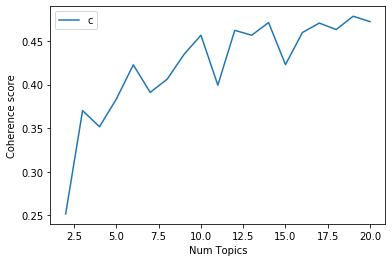

In [185]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tweets, start=2, limit=21, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=21; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [197]:
#ldamodel

## We have selected a total of 19 topics

In [186]:
from pprint import pprint
best_index = coherence_values.index(max(coherence_values))
ldamodel = model_list[best_index]
best_num_topics = start+step*best_index
topic_term_matrix = ldamodel.get_topics()

print("")
print("Best Model")
pprint(ldamodel.print_topics(num_topics=best_num_topics, num_words=20))

print('\n')

print("Number of topics = " + str(best_num_topics))


Best Model
[(0,
  '0.027*"behavior" + 0.025*"staff" + 0.022*"please" + 0.021*"apologize" + '
  '0.018*"happen" + 0.015*"game" + 0.015*"con" + 0.014*"sad" + 0.013*"need" + '
  '0.012*"support" + 0.012*"clean" + 0.011*"international_airport" + '
  '0.011*"always" + 0.011*"lots" + 0.010*"crap" + 0.010*"elsewhere" + '
  '0.010*"today" + 0.010*"behalf" + 0.009*"like" + 0.009*"verbal"'),
 (1,
  '0.037*"fly" + 0.023*"gross" + 0.018*"hope" + 0.015*"ask" + 0.015*"like" + '
  '0.014*"light" + 0.013*"one" + 0.012*"big" + 0.012*"always" + '
  '0.012*"airport" + 0.011*"walk" + 0.011*"experienced" + 0.010*"make" + '
  '0.010*"senior" + 0.009*"information" + 0.009*"aa" + 0.008*"plane" + '
  '0.008*"anywhere" + 0.008*"post" + 0.008*"next"'),
 (2,
  '0.021*"travel" + 0.019*"boarding" + 0.019*"plane" + 0.016*"make" + '
  '0.014*"next" + 0.014*"even" + 0.014*"awful" + 0.013*"high" + 0.013*"drop" + '
  '0.012*"consider" + 0.011*"take" + 0.011*"shame" + 0.011*"please" + '
  '0.011*"attention" + 0.011*"see

In [187]:
pprint(ldamodel.print_topics(num_topics=best_num_topics, num_words=20))

[(0,
  '0.027*"behavior" + 0.025*"staff" + 0.022*"please" + 0.021*"apologize" + '
  '0.018*"happen" + 0.015*"game" + 0.015*"con" + 0.014*"sad" + 0.013*"need" + '
  '0.012*"support" + 0.012*"clean" + 0.011*"international_airport" + '
  '0.011*"always" + 0.011*"lots" + 0.010*"crap" + 0.010*"elsewhere" + '
  '0.010*"today" + 0.010*"behalf" + 0.009*"like" + 0.009*"verbal"'),
 (1,
  '0.037*"fly" + 0.023*"gross" + 0.018*"hope" + 0.015*"ask" + 0.015*"like" + '
  '0.014*"light" + 0.013*"one" + 0.012*"big" + 0.012*"always" + '
  '0.012*"airport" + 0.011*"walk" + 0.011*"experienced" + 0.010*"make" + '
  '0.010*"senior" + 0.009*"information" + 0.009*"aa" + 0.008*"plane" + '
  '0.008*"anywhere" + 0.008*"post" + 0.008*"next"'),
 (2,
  '0.021*"travel" + 0.019*"boarding" + 0.019*"plane" + 0.016*"make" + '
  '0.014*"next" + 0.014*"even" + 0.014*"awful" + 0.013*"high" + 0.013*"drop" + '
  '0.012*"consider" + 0.011*"take" + 0.011*"shame" + 0.011*"please" + '
  '0.011*"attention" + 0.011*"see" + 0.011*"c

In [188]:
#ldamodel=LdaModel(corpus=corpus, id2word=dictionary, num_topics=7, alpha=0.0001)

In [189]:
lda_topics = ldamodel.print_topics(num_topics=best_num_topics, num_words=10)

In [190]:
pprint(lda_topics)

[(0,
  '0.027*"behavior" + 0.025*"staff" + 0.022*"please" + 0.021*"apologize" + '
  '0.018*"happen" + 0.015*"game" + 0.015*"con" + 0.014*"sad" + 0.013*"need" + '
  '0.012*"support"'),
 (1,
  '0.037*"fly" + 0.023*"gross" + 0.018*"hope" + 0.015*"ask" + 0.015*"like" + '
  '0.014*"light" + 0.013*"one" + 0.012*"big" + 0.012*"always" + '
  '0.012*"airport"'),
 (2,
  '0.021*"travel" + 0.019*"boarding" + 0.019*"plane" + 0.016*"make" + '
  '0.014*"next" + 0.014*"even" + 0.014*"awful" + 0.013*"high" + 0.013*"drop" + '
  '0.012*"consider"'),
 (3,
  '0.022*"beyond" + 0.018*"priority" + 0.016*"available" + 0.013*"would" + '
  '0.013*"plane" + 0.013*"stand" + 0.012*"please" + 0.012*"blue" + '
  '0.012*"time" + 0.011*"trying"'),
 (4,
  '0.025*"security" + 0.017*"experience" + 0.016*"service" + 0.016*"staff" + '
  '0.015*"agent" + 0.014*"airport" + 0.014*"wrongfully_arrested" + '
  '0.013*"airlines_pilot" + 0.013*"got" + 0.013*"ever"'),
 (5,
  '0.045*"new" + 0.017*"right" + 0.015*"would" + 0.015*"one"

In [192]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt

%matplotlib inline

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

C:\Users\Chiran\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4      0.076720 -0.011618       1        1  6.475179
7      0.014996  0.007835       2        1  6.464111
18     0.092764  0.079870       3        1  6.249074
17     0.027190 -0.016376       4        1  6.165863
9      0.054108 -0.168930       5        1  5.897643
6     -0.003689 -0.004490       6        1  5.715783
5     -0.039979 -0.107423       7        1  5.573161
12     0.068372  0.052631       8        1  5.427732
11     0.163075 -0.008292       9        1  5.216123
8      0.044402 -0.102214      10        1  5.210492
2     -0.136186  0.049770      11        1  5.009728
1     -0.042075  0.075959      12        1  4.865811
16    -0.222949 -0.005266      13        1  4.769023
14    -0.042831 -0.132154      14        1  4.754189
13    -0.025334  0.085432      15        1  4.681809
15    -0.004406  0.034043      16        1  4.629114
3     -0.082048 -0.002692      17        1  4.530326
0      0.021181  0.013939      18        1  4.339186
10     0.036687  0.159978      19        1  4.025642, topic_info=    Category        Freq        Term       Total  loglift  logprob
960  Default  110.000000  disgusting  110.000000  30.0000  30.0000
30   Default  491.000000       plane  491.000000  29.0000  29.0000
17   Default  223.000000       sorry  223.000000  28.0000  28.0000
289  Default  299.000000         fly  299.000000  27.0000  27.0000
561  Default   83.000000  boeing_max   83.000000  26.0000  26.0000
..       ...         ...         ...         ...      ...      ...
109  Topic19   18.148851        love  130.188736   1.2421  -4.6873
124  Topic19   19.495686        back  249.154663   0.6646  -4.6157
644  Topic19   17.616806         way  156.004181   1.0315  -4.7171
51   Topic19   16.847462        need  250.089798   0.5149  -4.7617
200  Topic19   14.497831         got  254.250092   0.3482  -4.9119

[1095 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
838       3  0.057236              aa
838       6  0.057236              aa
838       8  0.028618              aa
838       9  0.057236              aa
838      10  0.143090              aa
...     ...       ...             ...
26       15  0.027854             yet
26       19  0.041781             yet
2342      2  0.147461          yr_old
2342      5  0.737304          yr_old
2296      9  0.851031  zu_mileageplus

[3693 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 19, 18, 10, 7, 6, 13, 12, 9, 3, 2, 17, 15, 14, 16, 4, 1, 11])

In [196]:
topic_num = 1
df_col = []
df = pd.DataFrame()
col_header = 'Topic '

import re

regex = re.compile('[^a-zA-Z_]')
#First parameter is the replacement, second parameter is your input string


for i in range(len(lda_topics)):
    df_col = list(filter(lambda x: x!='',regex.sub(' ', lda_topics[i][1]).split(' ')))
    curr_header = col_header + str(topic_num)
    
    #print(len(df_col))
    df[curr_header] = df_col
    
    
    topic_num += 1
    df_col=[]

df
    


,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,behavior,fly,travel,beyond,security,new,white,bag,first_class,wrong,boeing_max,sorry,seat,need,disgusting,class,plane,like,close
1,staff,gross,boarding,priority,experience,right,another,still,racist,like,nice,people,kind,got,th,ever,fly,blog_airlines,management
2,please,hope,plane,available,service,would,ticket,see,delta,would,home,person,would,clear,news,sure,sorry_happened,time,via
3,apologize,ask,make,would,staff,one,time,must,black,really,go,return,back,strong,man,star_wars,worth,finally_got,contact
4,happen,like,next,plane,agent,every,hey,late,clear,way,woman,look,put,getting,plane,suck,think,back,well
5,game,light,even,stand,airport,charging,sat,made,fly,life,save,experience,web,end,lounge,still,time,one,need
6,con,one,awful,please,wrongfully_arrested,respect,lawyer,go,best,racist,case,racism,rock,son,hate,entire,pilot,country,taken
7,sad,big,high,blue,airlines_pilot,join,girl,gave,deal,first,goes,better,booking,hit,share,flying,human,send,team
8,need,always,drop,time,got,plane,believe,departure,good,start,cash,went,everything,plane,never,dignity,watch,damn,check
9,support,airport,consider,trying,ever,accommodate,change,know,experience,yes,lose,forward,better,since,campaign,update,even,thank,fee


In [ ]:
df1to10 = 

In [194]:
df.iloc[:, 0:10]

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
0,behavior,fly,travel,beyond,security,new,white,bag,first_class,wrong
1,staff,gross,boarding,priority,experience,right,another,still,racist,like
2,please,hope,plane,available,service,would,ticket,see,delta,would
3,apologize,ask,make,would,staff,one,time,must,black,really
4,happen,like,next,plane,agent,every,hey,late,clear,way
5,game,light,even,stand,airport,charging,sat,made,fly,life
6,con,one,awful,please,wrongfully_arrested,respect,lawyer,go,best,racist
7,sad,big,high,blue,airlines_pilot,join,girl,gave,deal,first
8,need,always,drop,time,got,plane,believe,departure,good,start
9,support,airport,consider,trying,ever,accommodate,change,know,experience,yes


In [195]:
df.iloc[:, 10:]

,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,boeing_max,sorry,seat,need,disgusting,class,plane,like,close
1,nice,people,kind,got,th,ever,fly,blog_airlines,management
2,home,person,would,clear,news,sure,sorry_happened,time,via
3,go,return,back,strong,man,star_wars,worth,finally_got,contact
4,woman,look,put,getting,plane,suck,think,back,well
5,save,experience,web,end,lounge,still,time,one,need
6,case,racism,rock,son,hate,entire,pilot,country,taken
7,goes,better,booking,hit,share,flying,human,send,team
8,cash,went,everything,plane,never,dignity,watch,damn,check
9,lose,forward,better,since,campaign,update,even,thank,fee
